In [9]:
import pandas as pd


df = pd.read_csv("/Users/cyrenayang/Documents/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")  


city_df = df[df["City"] == "Philadelphia"]

city_df.to_csv("philadelphia_only.csv", index=False)

# Find the index where date columns start
date_cols = df.columns[df.columns.get_loc("2000-01-31"):]

# Melt only the date columns
melted = pd.melt(
    city_df,
    id_vars=["RegionID", "RegionName", "RegionType", "StateName", "State", 
             "City", "Metro", "CountyName"],
    value_vars=date_cols,
    var_name="Date",
    value_name="ZHVI"
)

# Convert the 'Date' column to datetime
melted["Date"] = pd.to_datetime(melted["Date"])

# Preview
print(melted.head())

   RegionID     RegionName    RegionType StateName State          City  \
0    214232  Oxford Circle  neighborhood        PA    PA  Philadelphia   
1    214146          Olney  neighborhood        PA    PA  Philadelphia   
2    274834  West Oak Lane  neighborhood        PA    PA  Philadelphia   
3    274451        Mayfair  neighborhood        PA    PA  Philadelphia   
4    208850      Bustleton  neighborhood        PA    PA  Philadelphia   

                                         Metro           CountyName  \
0  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD  Philadelphia County   
1  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD  Philadelphia County   
2  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD  Philadelphia County   
3  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD  Philadelphia County   
4  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD  Philadelphia County   

        Date           ZHVI  
0 2000-01-31   66884.809038  
1 2000-01-31   48294.718745  
2 2000-01-31   59756.496662  
3 2000-0

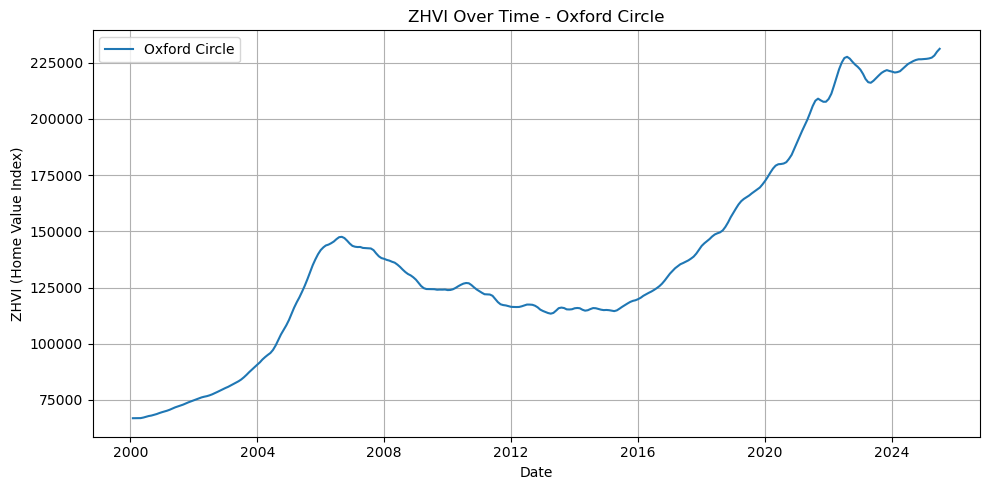

In [10]:
import matplotlib.pyplot as plt

# Filter to one neighborhood
oxford_df = melted[melted["RegionName"] == "Oxford Circle"]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(oxford_df["Date"], oxford_df["ZHVI"], label="Oxford Circle")
plt.title("ZHVI Over Time - Oxford Circle")
plt.xlabel("Date")
plt.ylabel("ZHVI (Home Value Index)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


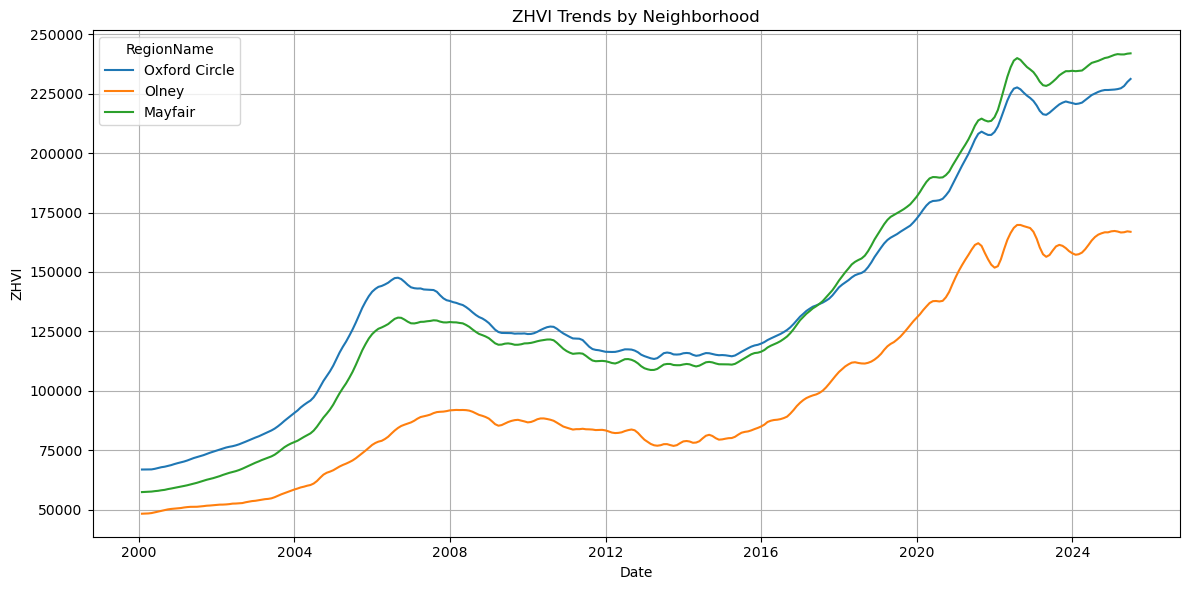

In [ ]:
import seaborn as sns

# Pick a few neighborhoods to compare
neighborhoods = ["Oxford Circle", "Olney", "Mayfair"]
multi_df = melted[melted["RegionName"].isin(neighborhoods)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=multi_df, x="Date", y="ZHVI", hue="RegionName")
plt.title("ZHVI Trends by Neighborhood")
plt.xlabel("Date")
plt.ylabel("ZHVI")
plt.grid(True)
plt.tight_layout()
plt.show()
\


KeyboardInterrupt: 

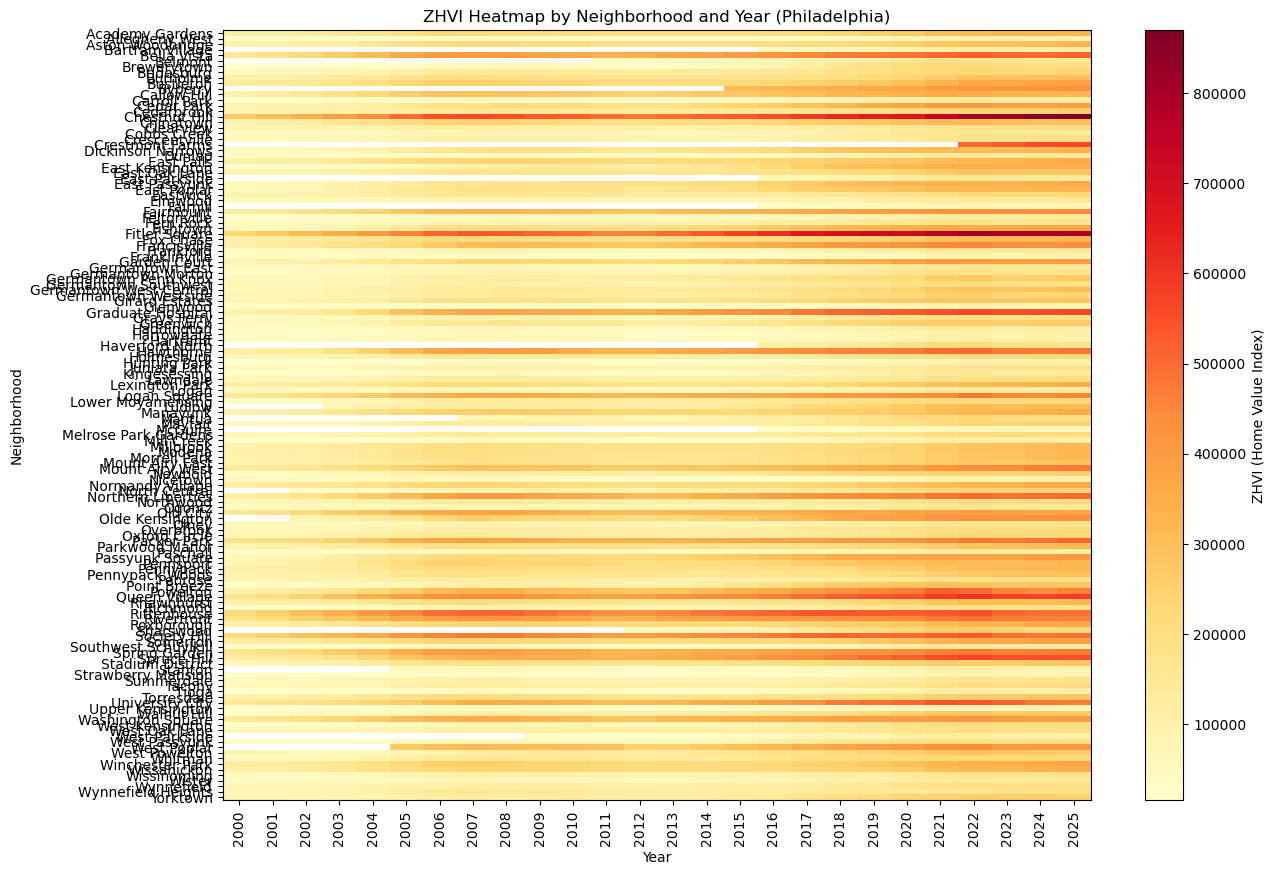

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract year from the 'Date' column
melted["Year"] = melted["Date"].dt.year

# Step 2: Create a pivot table — rows: neighborhoods, columns: years
pivot = (
    melted[melted["City"] == "Philadelphia"]
    .groupby(["RegionName", "Year"])["ZHVI"]
    .mean()
    .unstack(fill_value=np.nan)  # handle missing years
)

# Step 3: Plot heatmap using matplotlib
plt.figure(figsize=(14, 10))
plt.imshow(pivot, aspect='auto', cmap="YlOrRd", interpolation='nearest')

# Step 4: Axis labels and ticks
plt.title("ZHVI Heatmap by Neighborhood and Year (Philadelphia)")
plt.xlabel("Year")
plt.ylabel("Neighborhood")

# Set x-axis labels
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns, rotation=90)

# Set y-axis labels (can be long, so you can limit to top N if needed)
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)

# Colorbar
cbar = plt.colorbar()
cbar.set_label("ZHVI (Home Value Index)")

plt.tight_layout()
plt.show()
